# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"

<font size="4">Author Reginold K Binoy</font>

## ADVANCED LEVEL TASK

### TASK-8- Next Word Prediction

Using Tensorflow and Keras library train a RNN, to predict the next word.

Dataset link : https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view

# Importing necessary packages

In [1]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, LSTM, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

# Loading the data

In [2]:
path = 'text.txt'  # Update with your path
text = open(path, encoding="utf8").read().lower()
print('Corpus length:', len(text))

# Data Preprocessing
character = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))

print(f'Unique chars: {len(character)}')

Corpus length: 581888
Unique chars: 73


# Data Preprocessing

In [3]:
character = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))

print(f'Unique chars: {len(character)}')

Unique chars: 73


# Chunking 40 characters with step size of 3

In [4]:
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len])
    next_chars.append(text[i + seq_len])

print(f'Num training examples: {len(sentences)}')

Num training examples: 193950


# One-hot encoding

In [5]:
X = np.zeros((len(sentences), seq_len, len(character)), dtype=bool)
y = np.zeros((len(sentences), len(character)), dtype=bool)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

print(f'Input shape: {X.shape}, Output shape: {y.shape}')

Input shape: (193950, 40, 73), Output shape: (193950, 73)


# Creating the model

In [7]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation

# Model creation with Input layer
model = Sequential()

# Use Input as the first layer
model.add(Input(shape=(seq_len, len(character))))

# Add LSTM layer
model.add(LSTM(128))

# Output layer
model.add(Dense(len(character)))

# Activation layer
model.add(Activation('softmax'))

# Compile the model
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │       103,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 73)             │         9,417 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 73)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,841 (440.79 KB)

 Trainable params: 112,841 (440.79 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [10]:
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model

In [11]:
history = model.fit(X, y, validation_split=0.01, batch_size=128, epochs=7, shuffle=True).history

Epoch 1/7


2024-09-29 17:48:19.516175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1501/1501 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.3295 - loss: 2.3529 - val_accuracy: 0.3660 - val_loss: 2.2763
Epoch 2/7
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.4842 - loss: 1.7260 - val_accuracy: 0.4258 - val_loss: 2.1003
Epoch 3/7
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.5227 - loss: 1.5806 - val_accuracy: 0.4227 - val_loss: 2.0514
Epoch 4/7
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.5452 - loss: 1.5046 - val_accuracy: 0.4433 - val_loss: 2.0154
Epoch 5/7
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.5566 - loss: 1.4603 - val_accuracy: 0.4381 - val_loss: 1.9960
Epoch 6/7
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.5656 - loss: 1.4279 - val_accuracy: 0.4644 - val_loss: 1.9885
Epoch 7/7
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.5715 - loss: 1.4069 - val_accuracy: 0.4562 - val_loss: 2.0260


# Save the model

In [13]:
# Save the model in the new Keras format
model.save('next_word_model.keras')

# Save the training history
pickle.dump(history, open("history.p", "wb"))

# Load the model

In [14]:
model = load_model('next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

# Model Evaluation

In [15]:
loss_and_acc = model.evaluate(X, y)
print(f"Test Loss: {loss_and_acc[0]}")
print(f"Test Accuracy: {loss_and_acc[1]}")

6061/6061 ━━━━━━━━━━━━━━━━━━━━ 52s 9ms/step - accuracy: 0.5748 - loss: 1.3979
Test Loss: 1.3898110389709473
Test Accuracy: 0.5768033266067505


# Plotting training and validation accuracy/loss

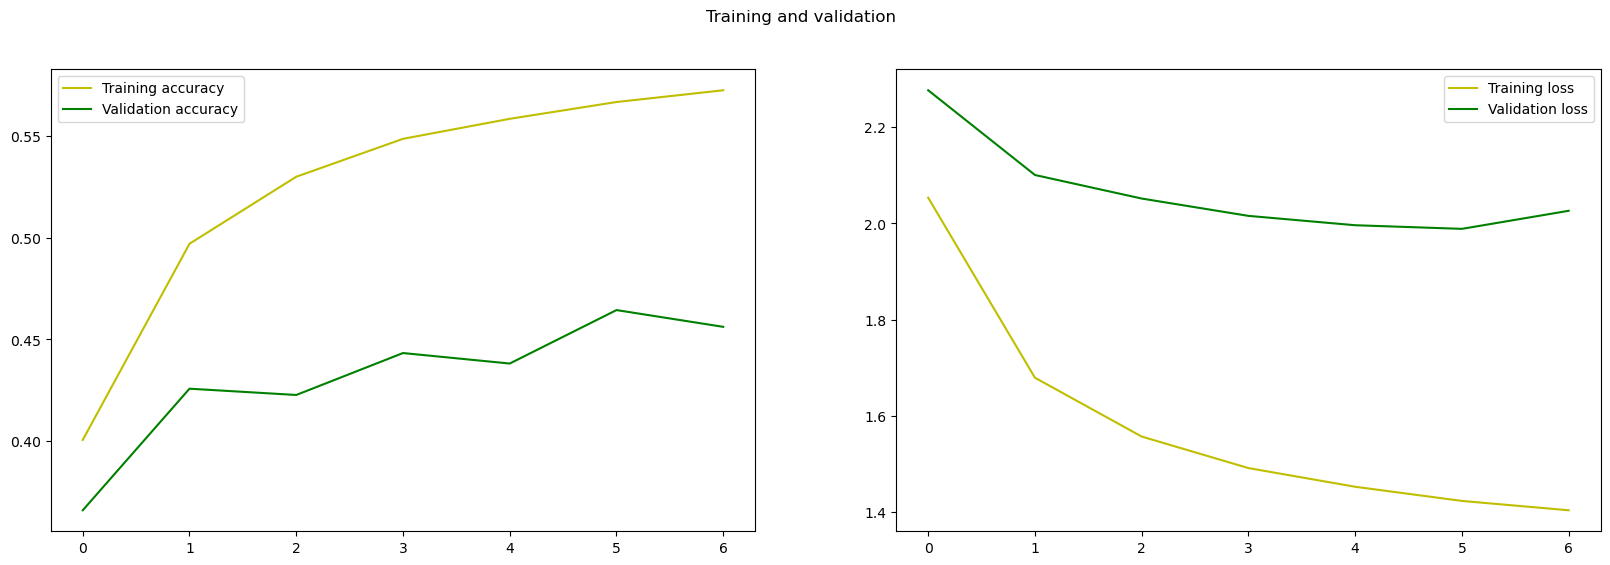

In [16]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

# Prepare input function for predictions

In [17]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
    return x

In [18]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

# Predict completion function

In [19]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

# Predict top N completions

In [20]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

# Prediction examples

In [21]:
quotes = [
    "Deep learning is subset of machine learning, which is essentially a neural network with three or more layers.",
    "Machine learning is the study of computer algorithms that improve automatically through experience and by the use of data.",
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "Recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data.",
    "Thanks for spending your precious time to view my work."
]

In [22]:
for q in quotes:
    seq = q[:40].lower()
    print(f"Input sequence: {seq}")
    print(f"Predictions: {predict_completions(seq, 5)}")
    print()

Input sequence: deep learning is subset of machine learn
Predictions: [' and ', '. ', 'ed ', ', ', 's ']

Input sequence: machine learning is the study of compute
Predictions: [' and ', 'n, ', ', ', '\nand ', 'd ']

Input sequence: it is not a lack of love, but a lack of 
Predictions: ['the ', 'his ', 'a ', 'my ', 'some ']

Input sequence: recurrent neural network (rnn) is a type
Predictions: ['whice ', 'fully ', 'ction ', 'rlook ', 'vines, ']

Input sequence: thanks for spending your precious time t
Predictions: ['o ', 'he ', 'ermed ', 'wo ', 'ime ']



# Thank You